In [270]:
import pandas as pd, numpy as np,matplotlib.pyplot as plt,seaborn as sns, matplotlib as mpl
from scipy import stats
mpl.rcParams['axes.unicode_minus'] = False # 设置支持负号显示

In [55]:
#load data
zz500 = pd.read_csv('C:/Users/23721/Downloads/FOF量化研究员面试题目/benchmark_close_daily.csv')
name = pd.read_csv('C:/Users/23721/Downloads/FOF量化研究员面试题目/fund_info_name.csv',encoding='gbk')
nav = pd.read_csv('C:/Users/23721/Downloads/FOF量化研究员面试题目/fund_nav_daily.csv')

In [57]:
#set timeline as index
zz500.index = pd.to_datetime(zz500.TradeDate)
zz500.drop('TradeDate',axis=1,inplace = True)
zz500.dropna(axis=0,inplace = True)
nav.index = pd.to_datetime(nav.TradeDate)
nav.drop('TradeDate',axis=1,inplace = True)
nav.dropna(axis=0,inplace = True)
nav.tail()

,000478.OF,001351.OF,002311.OF,002510.OF,002906.OF,003578.OF,003986.OF,004192.OF,004945.OF,005062.OF,161017.OF
TradeDate,,,,,,,,,,,
2021-05-25,2.7610,1.0334,1.4461,1.5998,1.331,1.6509,1.959098,1.3334,1.5654,1.4542,2.890557
2021-05-26,2.7680,1.0292,1.4437,1.5988,1.326,1.6488,1.957914,1.3330,1.5649,1.4552,2.889315
2021-05-27,2.7925,1.0407,1.4593,1.6137,1.341,1.6671,1.982041,1.3411,1.5837,1.4747,2.926581
2021-05-28,2.7889,1.0424,1.4572,1.6031,1.342,1.6608,1.981826,1.3374,1.5741,1.4684,2.915401
2021-05-31,2.8146,1.0585,1.4707,1.6128,1.359,1.6748,2.003584,1.3529,1.5846,1.4800,2.943971


In [286]:
#收益率(log形式，下同)
re = (np.log(nav.shift(1))-np.log(nav)).dropna()

#累计收益率
re_cum = re.cumsum()

#最大回撤
maxdrawdown = (re_cum.expanding().max()-re_cum).max()

#超额收益率（相对中证500，下同）
zz500_re = np.log(zz500.shift(1))-np.log(zz500)
abnormal_re = re-zz500_re.loc[re.index].values

#累计超额收益率
abnormal_re_cum = abnormal_re.cumsum()

#跟踪误差
tracking_error = abnormal_re.std()

#超额收益最大回撤
abnormal_maxdrawdown = (abnormal_re_cum.expanding().max()-abnormal_re_cum).max()

#信息比率
IR = abnormal_re.mean()/tracking_error

#sharpe(年化)
sharpe = re.mean()/re.std()*252**0.5

#表格
pd.DataFrame([re_cum.iloc[-1],maxdrawdown,abnormal_re.iloc[-1],tracking_error,abnormal_maxdrawdown,IR,sharpe],
             index = ['总收益率','最大回撤','总超额收益率','跟踪误差','超额收益最大回撤','IR','Sharpe']).T

,总收益率,最大回撤,总超额收益率,跟踪误差,超额收益最大回撤,IR,Sharpe
000478.OF,-0.178874,0.599008,-0.000093,0.002261,0.129553,-0.056246,-0.237930
001351.OF,-0.218784,0.620409,-0.006247,0.003230,0.173196,-0.054307,-0.289985
002311.OF,-0.354434,0.695939,-0.000142,0.002331,0.290250,-0.145600,-0.492352
002510.OF,-0.411061,0.846747,0.003047,0.004011,0.456336,-0.101692,-0.526962
002906.OF,-0.222408,0.698017,-0.003508,0.003772,0.270610,-0.047672,-0.285278
003578.OF,-0.417660,0.772265,0.000685,0.002898,0.344367,-0.143505,-0.584933
003986.OF,-0.493954,0.806601,-0.001839,0.004487,0.435445,-0.113246,-0.682194
004192.OF,-0.200506,0.608712,-0.002443,0.002482,0.171369,-0.061780,-0.279723
004945.OF,-0.479515,0.778198,0.002431,0.004038,0.427535,-0.121517,-0.665035
005062.OF,-0.402598,0.727375,0.001211,0.002902,0.346309,-0.137040,-0.542001


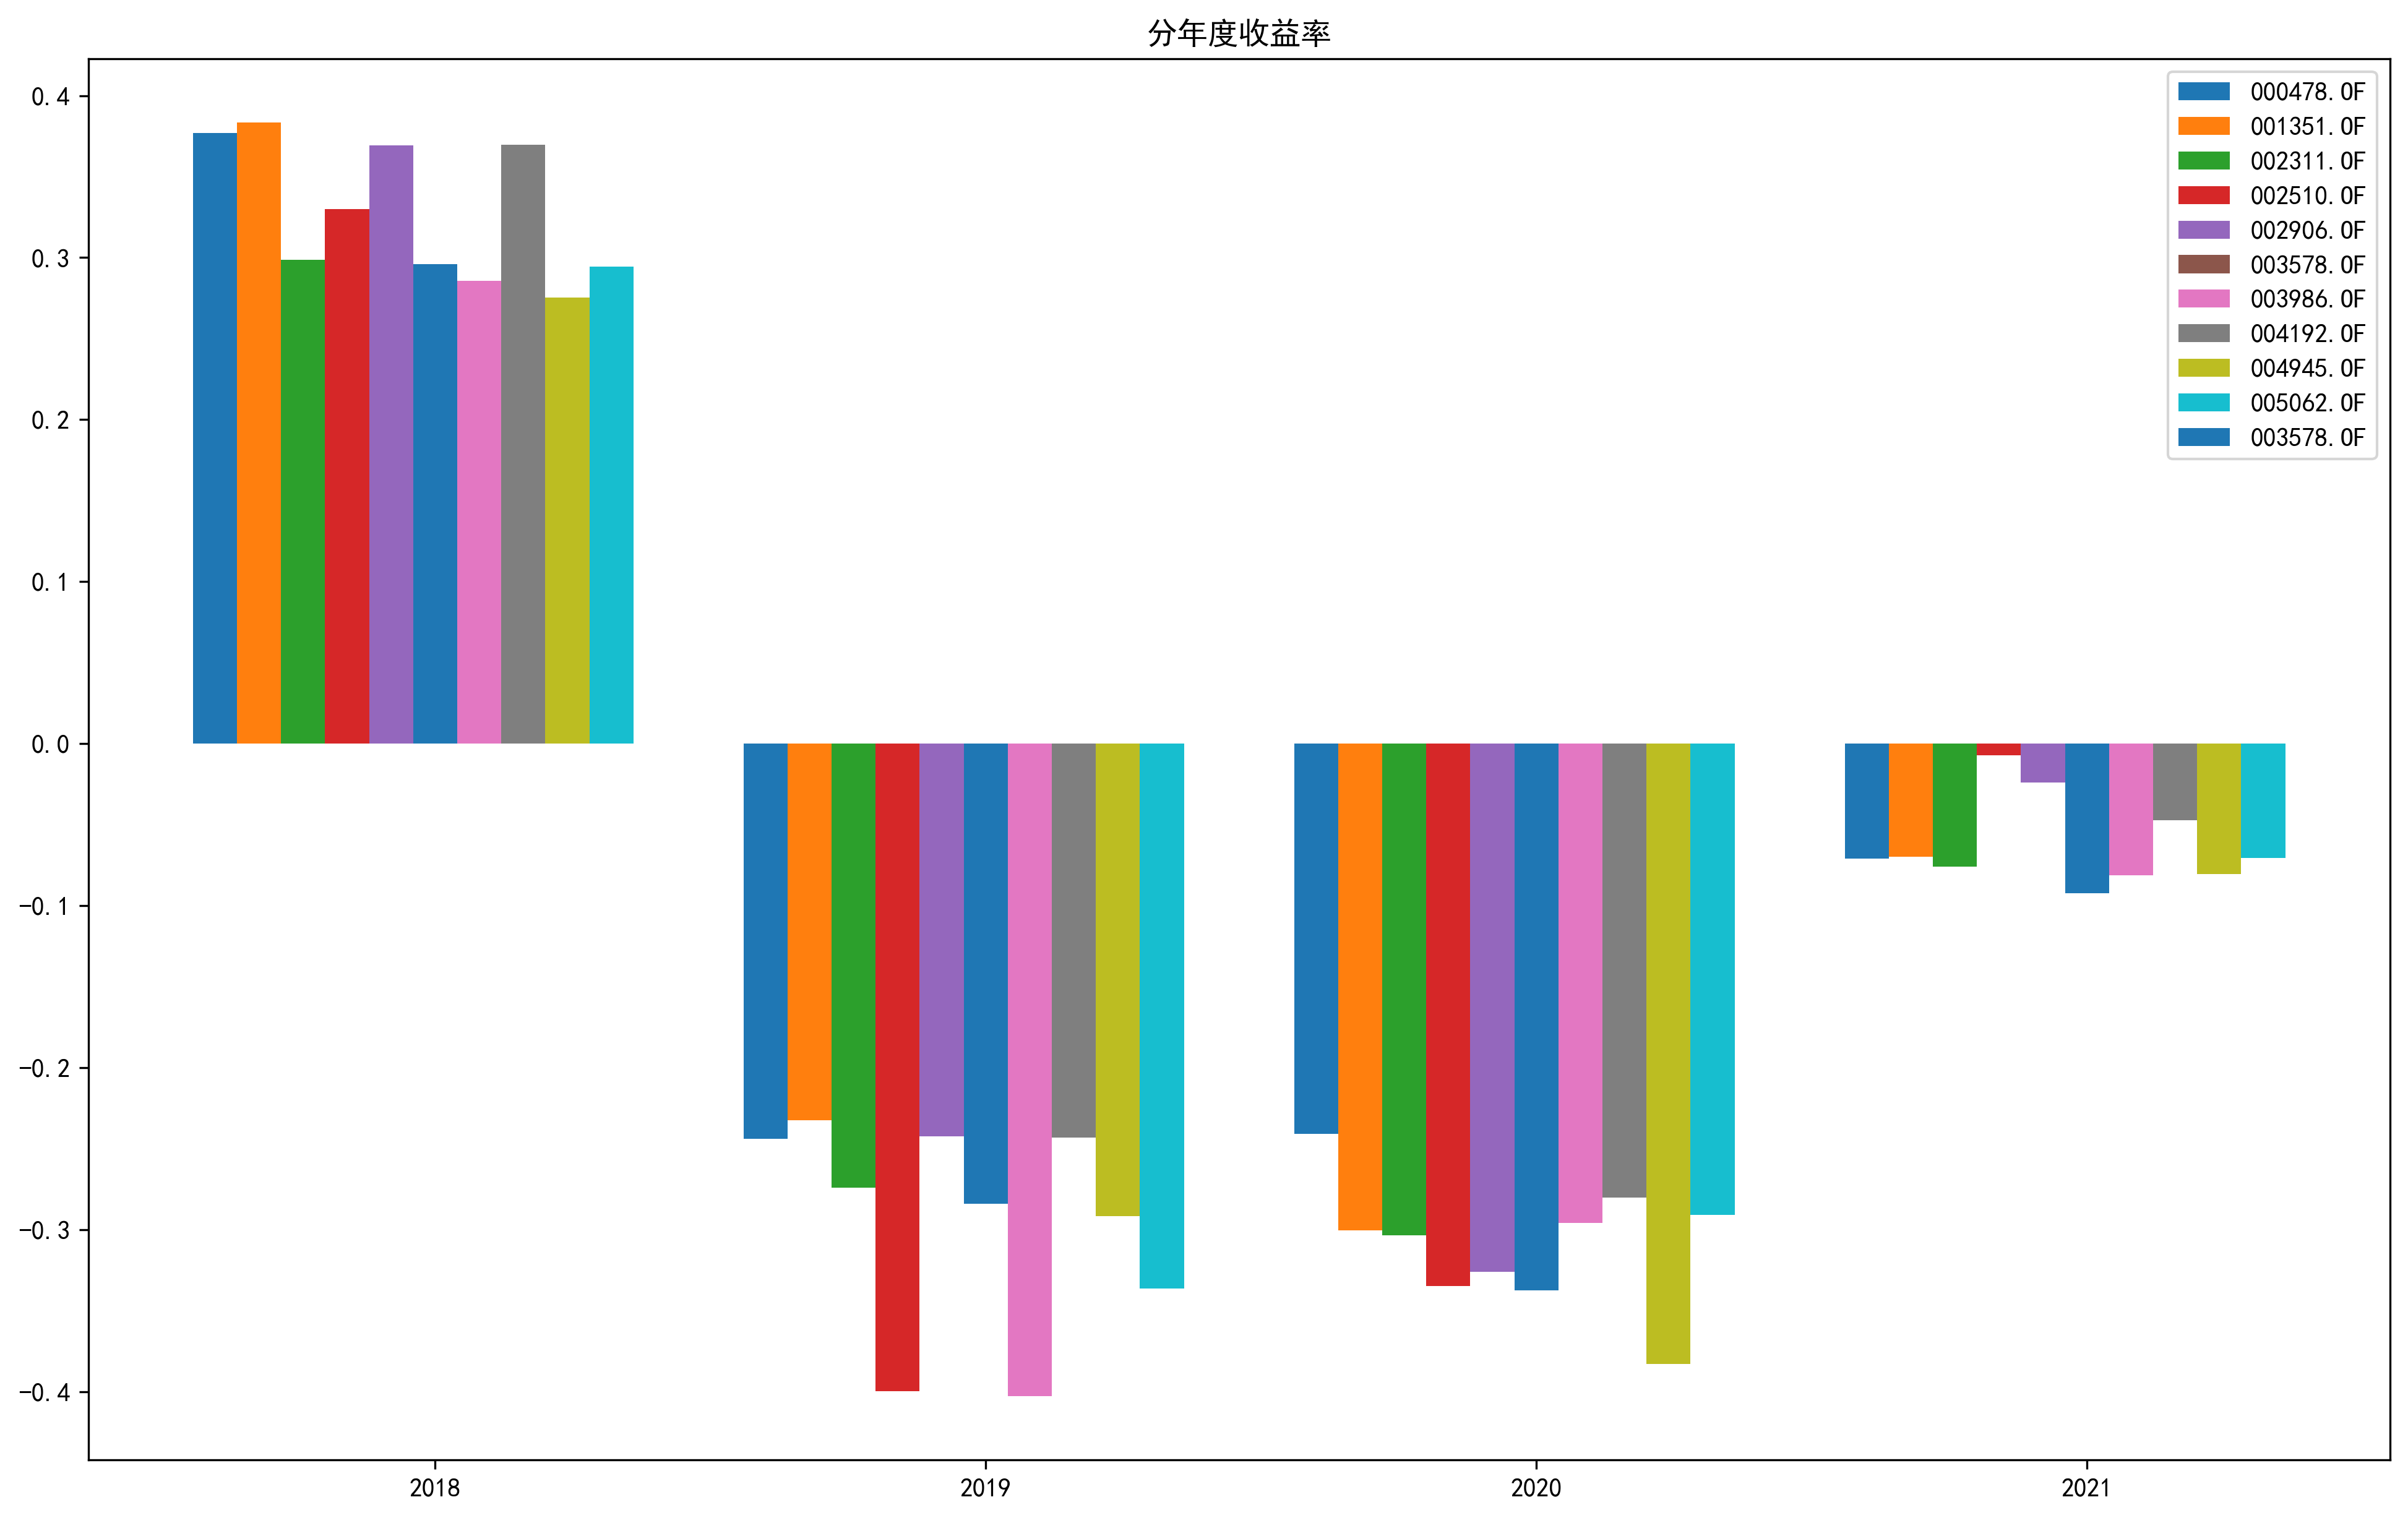

In [274]:
#分年度各基金收益率及超额收益率
annual_re=re.resample('y').sum()
annual_abnormal_re=abnormal_re.resample('y').sum()

#柱状图
name = annual_abnormal_re.index.year
x = np.arange(len(name))
width = 0.08

plt.figure(figsize=(16,10))
for i in range(10):
    plt.bar(x+i*width, annual_re.iloc[:,i].values,  width=width, label=annual_abnormal_re.columns[i])
i = 5
plt.bar(x+i*width, annual_re.iloc[:,i].values,  width=width, label=annual_abnormal_re.columns[i],tick_label=name)
plt.title('分年度收益率')
plt.legend()

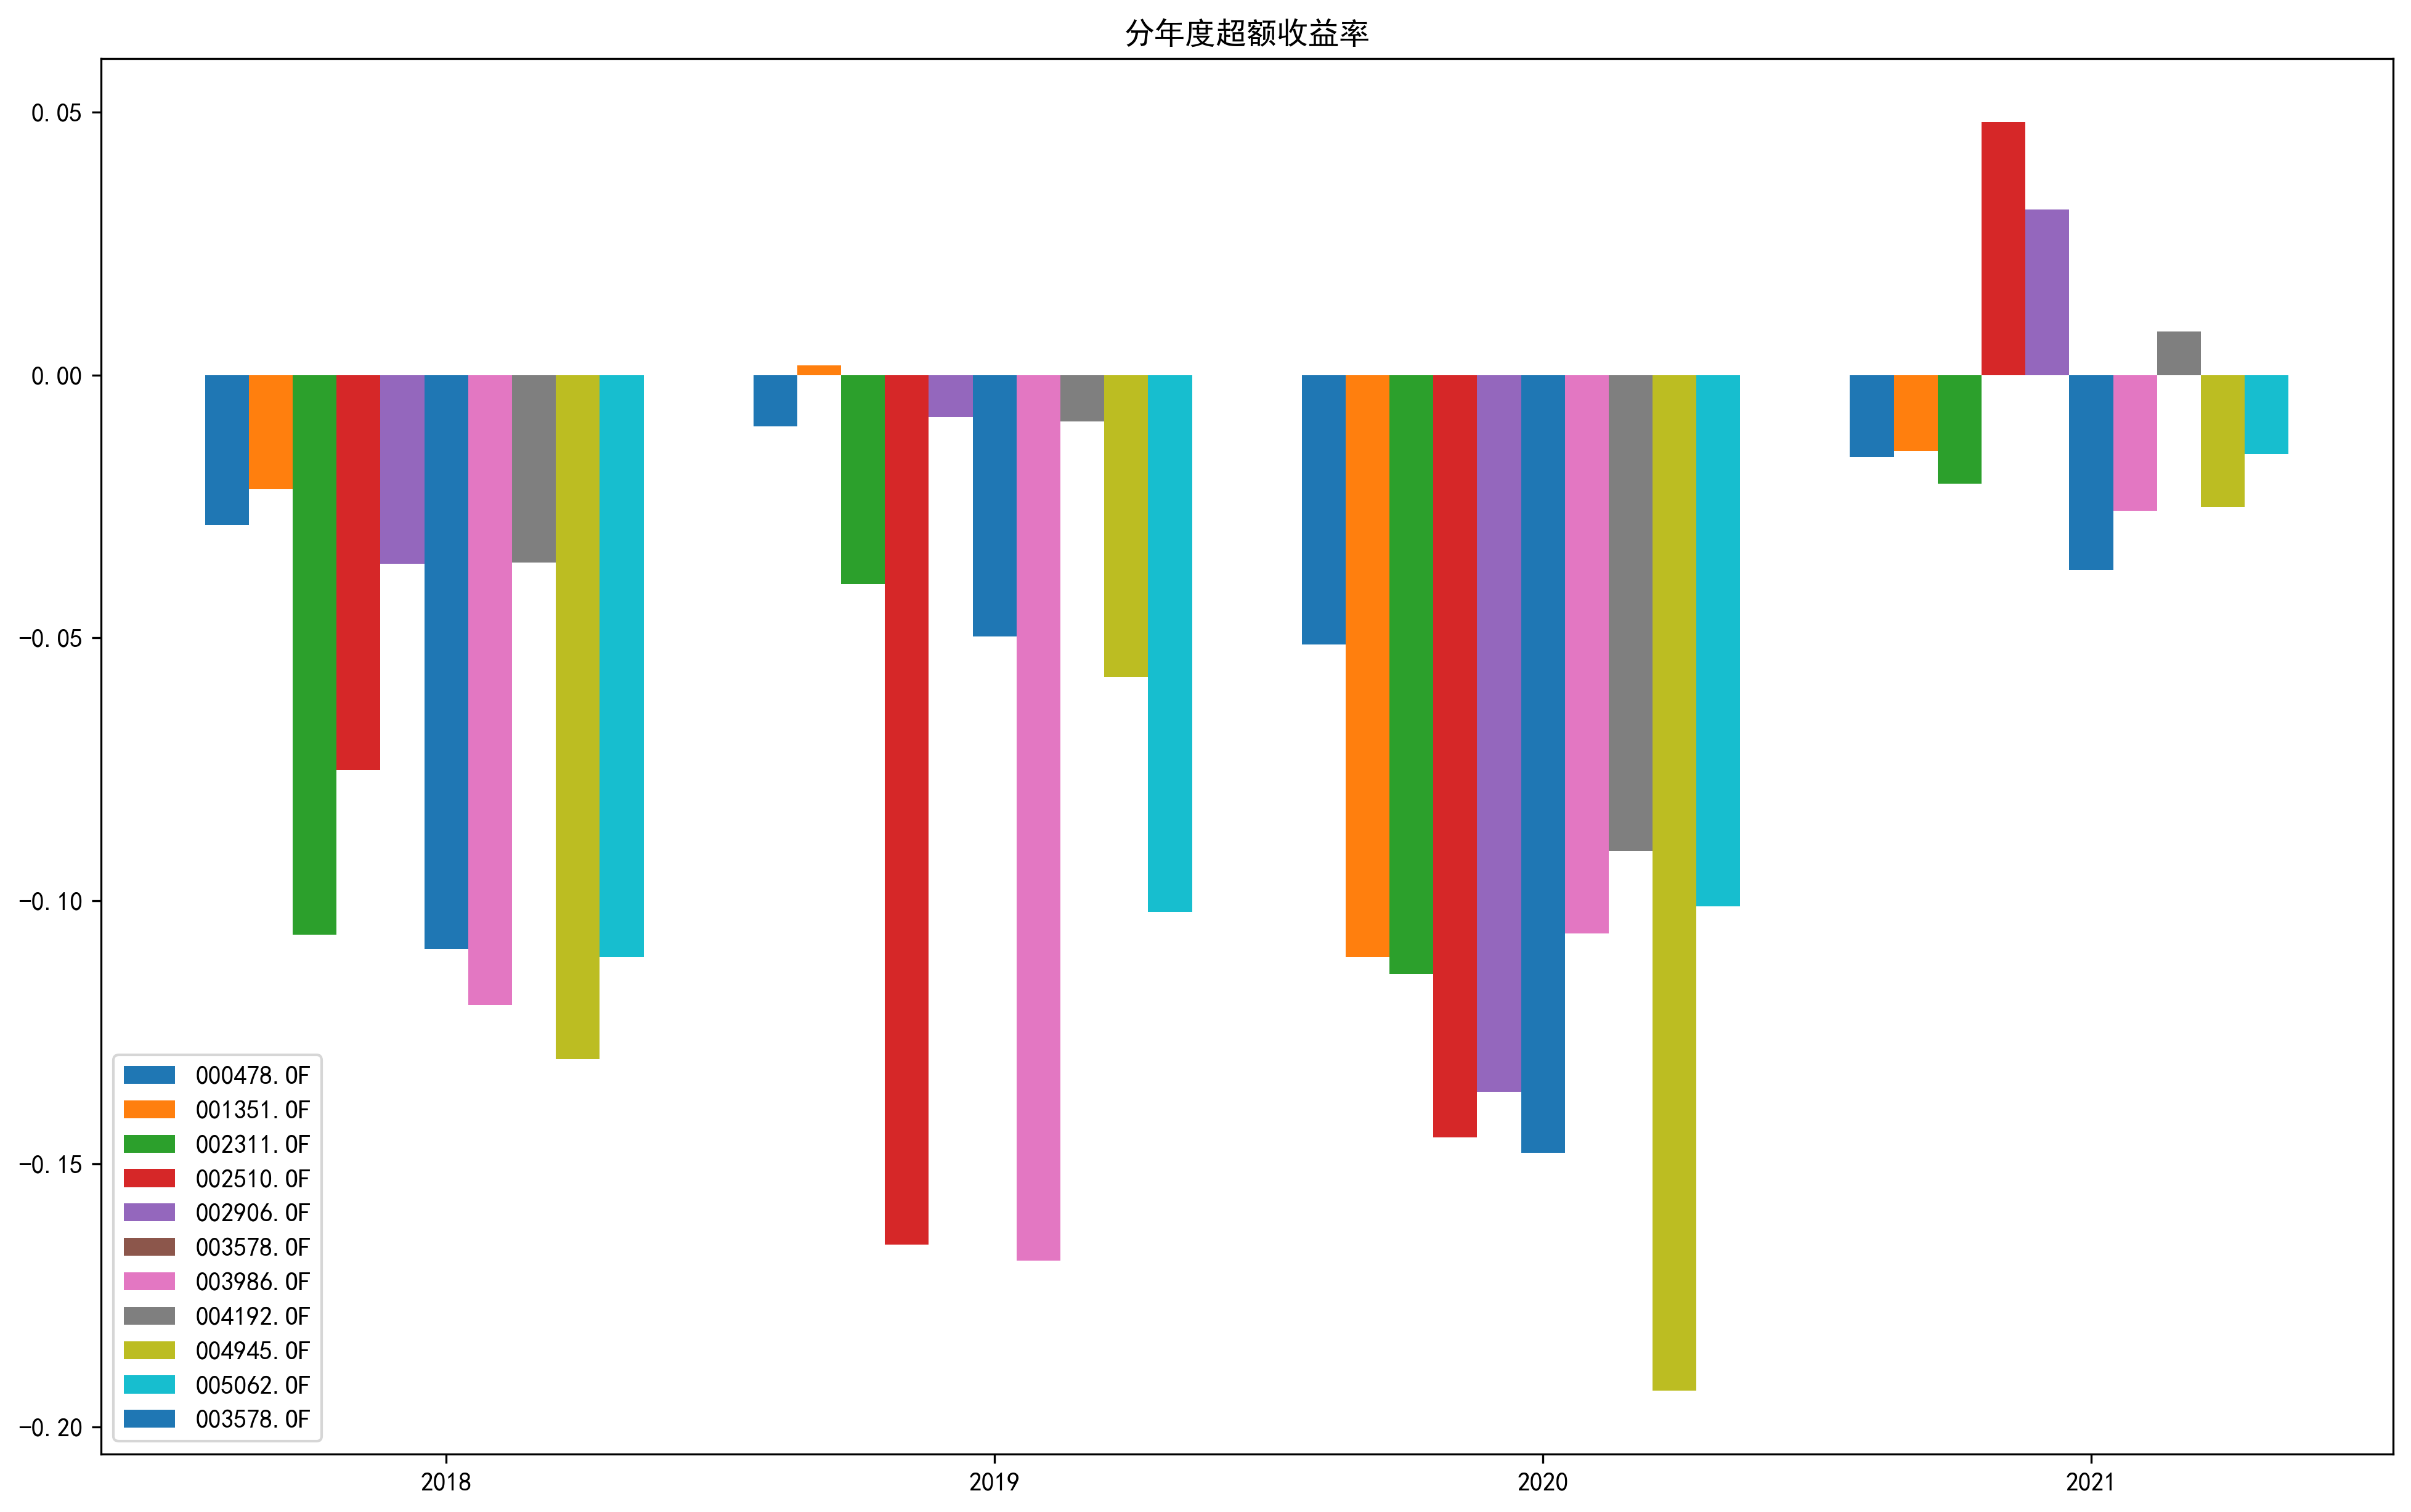

In [275]:
name = annual_abnormal_re.index.year
x = np.arange(len(name))
width = 0.08

plt.figure(figsize=(16,10))
for i in range(10):
    plt.bar(x+i*width, annual_abnormal_re.iloc[:,i].values,  width=width, label=annual_abnormal_re.columns[i])
i = 5
plt.bar(x+i*width, annual_abnormal_re.iloc[:,i].values,  width=width, label=annual_abnormal_re.columns[i],tick_label=name)
plt.title('分年度超额收益率')
plt.legend()

In [280]:
annual_re.T

TradeDate,2018-12-31,2019-12-31,2020-12-31,2021-12-31
000478.OF,0.376735,-0.243932,-0.240795,-0.070883
001351.OF,0.383486,-0.232349,-0.300186,-0.069735
002311.OF,0.298792,-0.273867,-0.303455,-0.075904
002510.OF,0.330095,-0.399462,-0.334538,-0.007156
002906.OF,0.369360,-0.242111,-0.325828,-0.023828
003578.OF,0.296119,-0.283896,-0.337494,-0.092389
003986.OF,0.285514,-0.402568,-0.295800,-0.081100
004192.OF,0.369623,-0.242972,-0.280092,-0.047066
004945.OF,0.275188,-0.291567,-0.382678,-0.080458
005062.OF,0.294612,-0.336278,-0.290610,-0.070321


In [281]:
annual_abnormal_re.T

TradeDate,2018-12-31,2019-12-31,2020-12-31,2021-12-31
000478.OF,-0.028533,-0.009790,-0.051235,-0.015604
001351.OF,-0.021782,0.001793,-0.110626,-0.014457
002311.OF,-0.106476,-0.039725,-0.113895,-0.020625
002510.OF,-0.075172,-0.165321,-0.144978,0.048123
002906.OF,-0.035908,-0.007970,-0.136268,0.031450
003578.OF,-0.109149,-0.049754,-0.147935,-0.037110
003986.OF,-0.119754,-0.168426,-0.106240,-0.025822
004192.OF,-0.035644,-0.008830,-0.090533,0.008213
004945.OF,-0.130080,-0.057425,-0.193118,-0.025180
005062.OF,-0.110656,-0.102137,-0.101050,-0.015042


<AxesSubplot:>

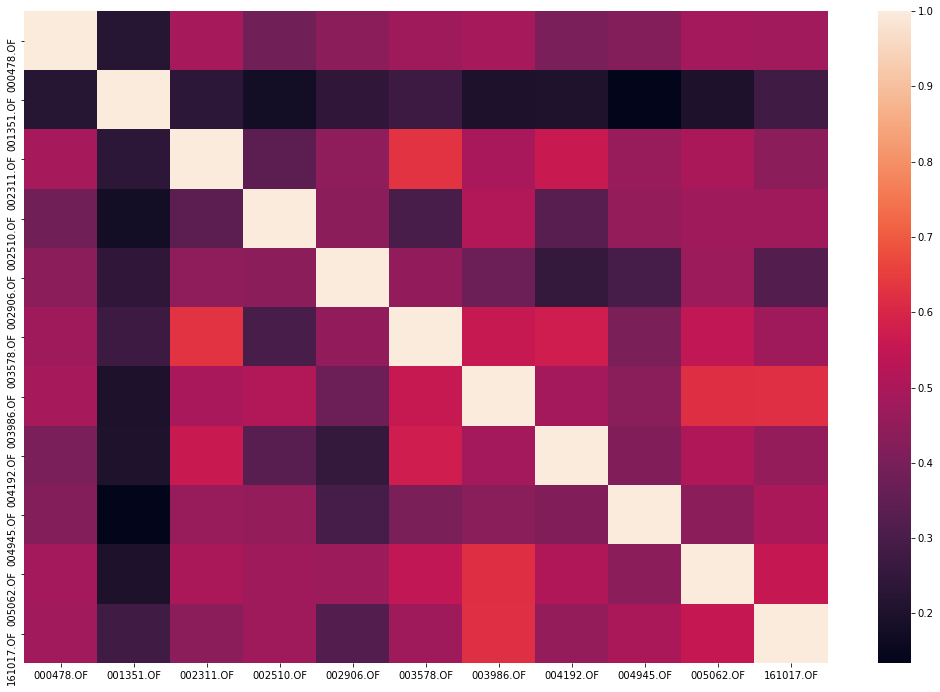

In [150]:
#超额收益相关系数
abnormal_re_corr = abnormal_re.corr()

#heatmap
plt.figure(figsize=(18,12))
sns.heatmap(abnormal_re_corr)

In [287]:
abnormal_re_corr

,000478.OF,001351.OF,002311.OF,002510.OF,002906.OF,003578.OF,003986.OF,004192.OF,004945.OF,005062.OF,161017.OF
000478.OF,1.000000,0.222731,0.490304,0.383917,0.439962,0.476332,0.491846,0.401562,0.421531,0.484523,0.481121
001351.OF,0.222731,1.000000,0.235949,0.177150,0.243473,0.273856,0.200859,0.203490,0.133419,0.200598,0.280693
002311.OF,0.490304,0.235949,1.000000,0.341963,0.445800,0.630339,0.493918,0.561056,0.463171,0.500972,0.438426
002510.OF,0.383917,0.177150,0.341963,1.000000,0.434911,0.299768,0.514594,0.331383,0.456710,0.474813,0.474152
002906.OF,0.439962,0.243473,0.445800,0.434911,1.000000,0.450000,0.372211,0.253611,0.292615,0.471914,0.319975
003578.OF,0.476332,0.273856,0.630339,0.299768,0.450000,1.000000,0.558780,0.575252,0.405915,0.543041,0.478548
003986.OF,0.491846,0.200859,0.493918,0.514594,0.372211,0.558780,1.000000,0.488850,0.432869,0.619177,0.620956
004192.OF,0.401562,0.203490,0.561056,0.331383,0.253611,0.575252,0.488850,1.000000,0.415989,0.512389,0.457552
004945.OF,0.421531,0.133419,0.463171,0.456710,0.292615,0.405915,0.432869,0.415989,1.000000,0.437568,0.498134
005062.OF,0.484523,0.200598,0.500972,0.474813,0.471914,0.543041,0.619177,0.512389,0.437568,1.000000,0.555790


In [166]:
#确定月末时间点
timeline = pd.Series(re.index,index = re.index)
time_m = timeline.resample('m').last()

,000478.OF,001351.OF,002311.OF,002510.OF,002906.OF,003578.OF,003986.OF,004192.OF,004945.OF,005062.OF,161017.OF
TradeDate,,,,,,,,,,,
2018-01-31,0.014055,0.017439,0.011547,0.012971,0.018116,0.017345,0.015602,0.017133,0.012855,0.010453,0.013642
2018-02-01,0.028369,0.029064,0.026820,0.026177,0.027805,0.029229,0.023702,0.030005,0.024685,0.023977,0.028766
2018-02-02,-0.002554,-0.002689,-0.000391,-0.011554,-0.005623,-0.002635,-0.011506,-0.006353,-0.008836,-0.009700,-0.006364
2018-02-05,0.001731,0.000977,0.000782,-0.003053,-0.000934,-0.002085,-0.004137,-0.002325,-0.002625,-0.001206,0.000453
2018-02-06,0.045490,0.043697,0.043789,0.048250,0.050753,0.047284,0.048204,0.048154,0.043806,0.048986,0.049720
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-25,0.003166,0.001010,0.002899,0.000629,0.006473,0.002574,-0.003673,0.000379,0.000519,0.002619,-0.000665
2019-01-28,0.001557,0.002022,0.002907,0.002899,0.002601,0.004227,0.000648,0.002401,-0.001945,0.001312,0.000000
2019-01-29,0.010119,0.015127,0.010818,0.007984,0.015748,0.011003,0.002592,0.009534,0.008062,0.009101,0.006671


In [192]:
#滚动回测
#以过去一年为滚动回看区间计算IR
roll = abnormal_re.rolling(240)
rolling_IR = roll.mean()/roll.std()

#以月末为计算IR时间点
rolling_IR = rolling_IR.resample('m').last().dropna()

#取IR最大的3只基金平均分配
sortindex = np.argsort(np.argsort(rolling_IR)).shift(1)
sortindex[sortindex<8] = 0
sortindex[sortindex>=8] = 1
sortindex.index = time_m[sortindex.index].values
sortindex.fillna(0,inplace=True)

#回测得到组合收益率
backtest = pd.DataFrame(index = re.index,columns=re.columns)
backtest.loc[sortindex.index] = sortindex
backtest.fillna(method='bfill',inplace=True)
backtest.loc[:sortindex.index[0]]=np.nan
portfolio_re = (backtest*re).dropna().sum(axis=1)/3

In [278]:
#累计收益率
portfolio_re_cum = portfolio_re.cumsum()

#最大回撤
portfolio_maxdrawdown = (portfolio_re_cum.expanding().max()-portfolio_re_cum).max()

#超额收益率（相对中证500，下同）
abnormal_portfolio_re = (portfolio_re-zz500_re.loc[portfolio_re.index].T).T

#累计超额收益率
abnormal_portfolio_re_cum = abnormal_portfolio_re.cumsum()

#跟踪误差
portfolio_tracking_error = abnormal_portfolio_re.std()

#超额收益最大回撤
portfolio_abnormal_maxdrawdown = (abnormal_portfolio_re_cum.expanding().max()-abnormal_portfolio_re_cum).max()

#信息比率
portfolio_IR = abnormal_portfolio_re.mean()/portfolio_tracking_error

#sharpe(年化)
portfolio_sharpe = portfolio_re.mean()/portfolio_re.std()*252**0.5

pd.DataFrame([portfolio_re_cum.iloc[-1],portfolio_maxdrawdown,abnormal_portfolio_re_cum.iloc[-1].values[0],
              portfolio_tracking_error.values[0],portfolio_abnormal_maxdrawdown.values[0],portfolio_IR.values[0],
              portfolio_sharpe],index = ['总收益率','最大回撤','总超额收益率','跟踪误差','超额收益最大回撤','IR','Sharpe'],columns=['portfolio'])

,portfolio
总收益率,-0.612304
最大回撤,0.656028
总超额收益率,-0.133324
跟踪误差,0.002374
超额收益最大回撤,0.218872
IR,-0.096165
Sharpe,-1.164831


In [285]:
name = pd.read_csv('C:/Users/23721/Downloads/FOF量化研究员面试题目/fund_info_name.csv',encoding='gbk')
name

,FundCode,FundName
0,000478.OF,建信中证500指数增强A
1,001351.OF,诺安中证500指数增强A
2,002311.OF,创金合信中证500指数增强A
3,002510.OF,申万菱信中证500指数增强A
4,002906.OF,南方中证500增强A
5,003578.OF,中金中证500指数增强C
6,003986.OF,申万菱信中证500优选增强A
7,004192.OF,招商中证500指数增强A
8,004945.OF,长信中证500指数增强
9,005062.OF,博时中证500指数增强A


Text(0.5, 1.0, '策略超额收益')

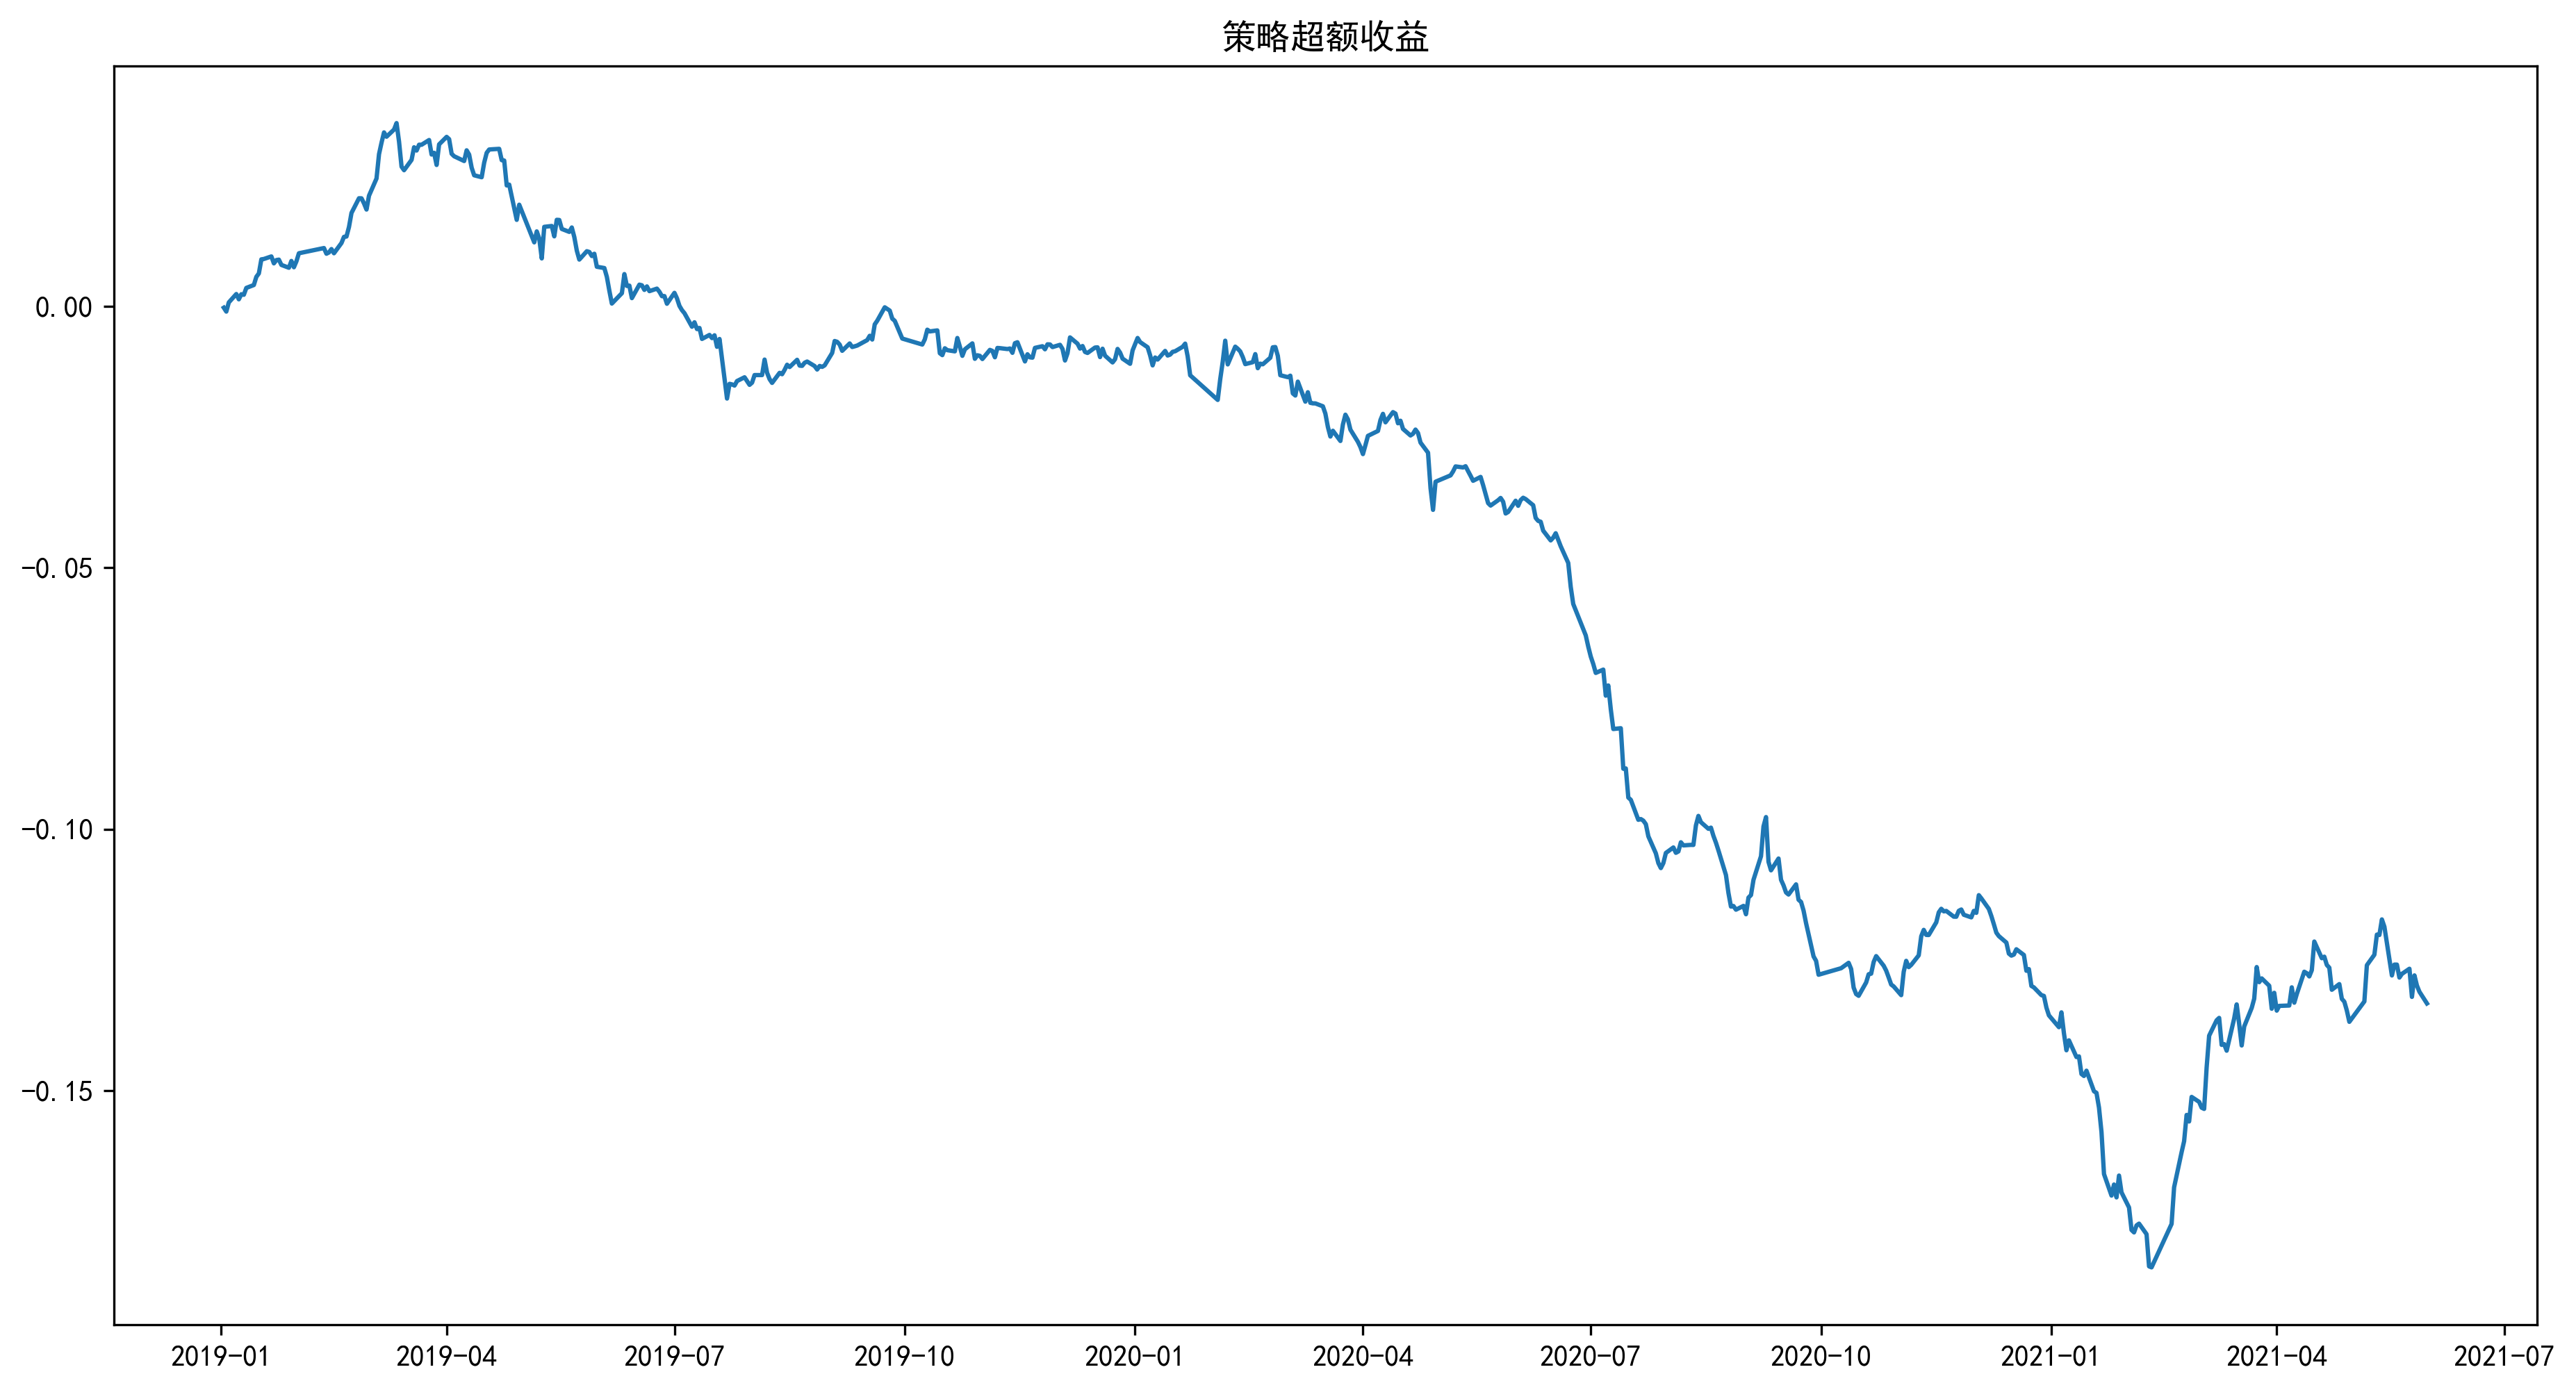

In [289]:
plt.plot(abnormal_portfolio_re_cum)
plt.title('策略超额收益')